# Covid impact on restaurants

!python --version

import pandas to preview the dataset

In [30]:
import pandas as pd


In [31]:
starbuck = pd.read_csv('StarBucks Covid.csv')

In [32]:
starbuck

,Column,New York,Borough,income_num_returns(households),avg income per return(x1000s),income level,DBA,STREET,GRADE DATE
0,63,10007,MANHATTAN,3640,693.379945,high income,STARBUCKS,BROADWAY,3/2/2020
1,132,10007,MANHATTAN,3640,693.379945,high income,STARBUCKS,CHURCH STREET,11/20/2019
2,155,10007,MANHATTAN,3640,693.379945,high income,STARBUCKS,BROADWAY,12/16/2019
3,263,10007,MANHATTAN,3640,693.379945,high income,STARBUCKS,BROADWAY,1/9/2019
4,299,10007,MANHATTAN,3640,693.379945,high income,STARBUCKS,BROADWAY,2/22/2019
...,...,...,...,...,...,...,...,...,...
86,10852,10309,STATEN ISLAND,15270,90.039424,medium income,STARBUCKS,PAGE AVENUE,11/7/2019
87,11697,10009,MANHATTAN,32690,87.208045,medium income,STARBUCKS,1 AVENUE,8/5/2019
88,12817,10455,BRONX,18080,29.715597,low income,STARBUCKS,EAST 149 STREET,11/19/2019
89,13176,11355,QUEENS,52130,29.435373,low income,STARBUCKS,MAIN STREET,2/24/2020


Install pyspark and import pyspark and matplotlib

In [33]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [35]:
from pyspark import SparkContext, SQLContext

In [36]:
sc = SparkContext()
s = SQLContext(sc)

In [37]:
data = s.read.options(header=True).csv('StarBucks Covid.csv')
data.createOrReplaceTempView("data")


Print the Schema of the dataset

In [38]:
data.printSchema()

root
 |-- Column: string (nullable = true)
 |-- New York: string (nullable = true)
 |-- Borough: string (nullable = true)
 |-- income_num_returns(households): string (nullable = true)
 |-- avg income per return(x1000s): string (nullable = true)
 |-- income level: string (nullable = true)
 |-- DBA: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- GRADE DATE: string (nullable = true)



Extract columns that I want from the big table 

In [39]:
p = data.select(['income_num_returns(households)','avg income per return(x1000s)','GRADE DATE','STREET'])
p.show()


+------------------------------+-----------------------------+----------+----------------+
|income_num_returns(households)|avg income per return(x1000s)|GRADE DATE|          STREET|
+------------------------------+-----------------------------+----------+----------------+
|                          3640|                  693.3799451|  3/2/2020|        BROADWAY|
|                          3640|                  693.3799451|11/20/2019|   CHURCH STREET|
|                          3640|                  693.3799451|12/16/2019|        BROADWAY|
|                          3640|                  693.3799451|  1/9/2019|        BROADWAY|
|                          3640|                  693.3799451| 2/22/2019|        BROADWAY|
|                         15920|                  662.7414573|  1/2/2020|        3 AVENUE|
|                         15920|                  662.7414573|12/18/2019|        1 AVENUE|
|                         15920|                  662.7414573| 3/22/2019|        3 AVENUE|

Compute the count of each store of Starbucks and use the biggest count store to analysis

In [40]:
data.groupBy("STREET").count().show(100)

+--------------------+-----+
|              STREET|count|
+--------------------+-----+
|    GREENWICH STREET|    1|
|    EAST  149 STREET|    1|
|         PAGE AVENUE|    1|
|            BROADWAY|   12|
|    EAST   53 STREET|    1|
|         YORK AVENUE|    1|
|    EAST   42 STREET|    3|
|        CANAL STREET|    1|
|    EAST   80 STREET|    1|
|    QUEENS BOULEVARD|    3|
|    WEST   73 STREET|    1|
|           35 AVENUE|    1|
|            2 AVENUE|    3|
|            5 AVENUE|    1|
|         PARK AVENUE|    1|
|     COLUMBUS AVENUE|    3|
|     FLATBUSH AVENUE|    2|
|    EAST   51 STREET|    1|
|  CONTINENTAL AVENUE|    2|
|      MADISON AVENUE|    6|
|       AUSTIN STREET|    2|
|            3 AVENUE|    6|
|    LAFAYETTE STREET|    1|
|     PARK AVE FRNT 1|    2|
|AVENUE OF THE AME...|    1|
|            1 AVENUE|    5|
|       CHURCH STREET|    1|
|         MAIN STREET|    3|
|    WEST   66 STREET|    1|
|    LEXINGTON AVENUE|   12|
|    EAST   69 STREET|    1|
|        WORTH

# Since now Broadway, Lexington ave have the most count, we query the data and draw the graph to analysis.

Draw the garph for Broadway starbucks

In [41]:
data.filter(data.STREET == "BROADWAY").show()
p1= data.filter(data.STREET == "BROADWAY").collect()
broadway = []
print(len(p1))
for i in range(len(p1)):
    broadway.append((p1[i][3],p1[i][8]))

bw = np.array(broadway)

sorted(bw, key= lambda x: x[:][0])

income = []

date = []
for i in bw:
    income.append(i[0])
    date.append(i[1])
    
income = np.array(income)
date = np.array(date)

plt.title('Total income and average for Broadway starbucks on specific dates')
plt.xlabel('dollars')
plt.ylabel('date')
plt.plot(income,date)



    





+------+--------+---------+------------------------------+-----------------------------+------------+---------+--------+----------+
|Column|New York|  Borough|income_num_returns(households)|avg income per return(x1000s)|income level|      DBA|  STREET|GRADE DATE|
+------+--------+---------+------------------------------+-----------------------------+------------+---------+--------+----------+
|    63|   10007|MANHATTAN|                          3640|                  693.3799451| high income|STARBUCKS|BROADWAY|  3/2/2020|
|   155|   10007|MANHATTAN|                          3640|                  693.3799451| high income|STARBUCKS|BROADWAY|12/16/2019|
|   263|   10007|MANHATTAN|                          3640|                  693.3799451| high income|STARBUCKS|BROADWAY|  1/9/2019|
|   299|   10007|MANHATTAN|                          3640|                  693.3799451| high income|STARBUCKS|BROADWAY| 2/22/2019|
|  3988|   10013|MANHATTAN|                         15140|                  

<IPython.core.display.Javascript object>

In [42]:
plt.close()

Draw the graph for Lexington ave starbucks

In [43]:
data.filter(data.STREET == "LEXINGTON AVENUE").show()
p2= data.filter(data.STREET == "LEXINGTON AVENUE").collect()
la = []
print(len(p2))
for i in range(len(p2)):
    la.append((p2[i][3],p2[i][8]))

LA = np.array(la)
LA = sorted(LA, key = lambda x: x[0])
for i in LA:
    print(i)


income = []
date = []
for i in LA:
    income.append(i[0])
    date.append(i[1])
income = np.array(income)
date = np.array(date)
plt.title('Total income for LEXINGTON AVENUE starbucks on specific dates')
plt.xlabel('dollars')
plt.ylabel('date')
plt.plot(income,date)
plt.show()



+------+--------+---------+------------------------------+-----------------------------+------------+---------+----------------+----------+
|Column|New York|  Borough|income_num_returns(households)|avg income per return(x1000s)|income level|      DBA|          STREET|GRADE DATE|
+------+--------+---------+------------------------------+-----------------------------+------------+---------+----------------+----------+
|   924|   10065|MANHATTAN|                         15920|                  662.7414573| high income|STARBUCKS|LEXINGTON AVENUE|  5/3/2019|
|  1782|   10022|MANHATTAN|                         20230|                  601.5358873| high income|STARBUCKS|LEXINGTON AVENUE|10/15/2019|
|  1833|   10022|MANHATTAN|                         20230|                  601.5358873| high income|STARBUCKS|LEXINGTON AVENUE|11/18/2019|
|  2737|   10022|MANHATTAN|                         20230|                  601.5358873| high income|STARBUCKS|LEXINGTON AVENUE| 5/15/2019|
|  5359|   10017|MAN

<IPython.core.display.Javascript object>

In [44]:
plt.close()
sc.stop()


# Now we try our second dataset which is Donkin Donats

In [45]:
sc1 = SparkContext()
s = SQLContext(sc1)

data1 = s.read.options(header=True).csv('Dunkin-Donats.csv')
data1.createOrReplaceTempView("data1")
q = data1.select(['income_num_returns(households)','avg income per return(x1000s)','GRADE DATE','STREET'])
q.show()


+------------------------------+-----------------------------+----------+----------------+
|income_num_returns(households)|avg income per return(x1000s)|GRADE DATE|          STREET|
+------------------------------+-----------------------------+----------+----------------+
|                          3640|                  693.3799451| 3/10/2020|   CHURCH STREET|
|                          3640|                  693.3799451|11/13/2019| CHAMBERS STREET|
|                          3640|                  693.3799451| 2/12/2019|   CHURCH STREET|
|                          3640|                  693.3799451| 4/26/2019|        BROADWAY|
|                          3640|                  693.3799451| 4/16/2019|      PARK PLACE|
|                         15920|                  662.7414573| 8/27/2019|        1 AVENUE|
|                         15920|                  662.7414573| 8/27/2019|LEXINGTON AVENUE|
|                         23350|                  618.3508779|  1/3/2019|        2 AVENUE|

Now we do the count check and choose the stores we wanted to analysis

In [46]:
data1.groupBy("STREET").count().show(100)

+--------------------+-----+
|              STREET|count|
+--------------------+-----+
|    EAST  170 STREET|    2|
|  COLLEGE POINT BLVD|    1|
|           48 STREET|    2|
|          150 STREET|    1|
|    EAST  149 STREET|    1|
|    ROSSVILLE AVENUE|    2|
|    EAST  138 STREET|    2|
|  QUEENS PLAZA NORTH|    1|
|    EAST   46 STREET|    1|
|     GARRISON AVENUE|    1|
|            BROADWAY|    2|
|           45 AVENUE|    1|
|         QUEENS BLVD|    1|
|        CANAL STREET|    6|
|   BEACH  129 STREET|    2|
| EAST TREMONT AVENUE|    2|
|          PARK PLACE|    1|
|   VANDERBILT AVENUE|    1|
|  NORTHERN BOULEVARD|    1|
|           26 AVENUE|    2|
|         JACKSON AVE|    1|
|      WEBSTER AVENUE|    1|
|    QUEENS BOULEVARD|    4|
|    EAST   86 STREET|    1|
|  BRUCKNER BOULEVARD|    2|
|            2 AVENUE|    3|
|        QUEENS PLZ S|    1|
|    WEST   72 STREET|    1|
|YELLOWSTONE BOULE...|    1|
|            5 AVENUE|    1|
|     CHAMBERS STREET|    1|
| CLINTONVILLE

choose the biggest count store which is Lexington ave

In [47]:
data1.filter(data1.STREET == "LEXINGTON AVENUE").show()
q1= data1.filter(data1.STREET == "LEXINGTON AVENUE").collect()
la = []
print(len(q1))
for i in range(len(q1)):
    la.append((q1[i][3],q1[i][8]))

LA = np.array(la)

LA= sorted(LA, key= lambda x: x[:][0])

income = []
date = []
for i in LA:
    income.append(i[0])
    date.append(i[1])
income = np.array(income)
date = np.array(date)
plt.title('Total income for LEXINGTON AVENUE Dunkin_Donats on specific dates')
plt.xlabel('dollars')
plt.ylabel('date')
plt.plot(income,date)


+------+--------+---------+------------------------------+-----------------------------+------------+-------+----------------+----------+
|Column|New York|  Borough|income_num_returns(households)|avg income per return(x1000s)|income level|    DBA|          STREET|GRADE DATE|
+------+--------+---------+------------------------------+-----------------------------+------------+-------+----------------+----------+
|   681|   10065|MANHATTAN|                         15920|                  662.7414573| high income|DUNKIN'|LEXINGTON AVENUE| 8/27/2019|
|  2005|   10022|MANHATTAN|                         20230|                  601.5358873| high income|DUNKIN'|LEXINGTON AVENUE| 8/22/2019|
|  2977|   10075|MANHATTAN|                         14310|                  513.4378057| high income|DUNKIN'|LEXINGTON AVENUE| 2/26/2020|
|  5005|   10017|MANHATTAN|                         12150|                  489.8909465| high income|DUNKIN'|LEXINGTON AVENUE| 1/17/2020|
|  5424|   10017|MANHATTAN|       

<IPython.core.display.Javascript object>

In [48]:
plt.close()



+------+--------+---------+------------------------------+-----------------------------+-------------+-------+--------+----------+
|Column|New York|  Borough|income_num_returns(households)|avg income per return(x1000s)| income level|    DBA|  STREET|GRADE DATE|
+------+--------+---------+------------------------------+-----------------------------+-------------+-------+--------+----------+
|   675|   10065|MANHATTAN|                         15920|                  662.7414573|  high income|DUNKIN'|1 AVENUE| 8/27/2019|
|  1617|   10022|MANHATTAN|                         20230|                  601.5358873|  high income|DUNKIN'|1 AVENUE| 2/10/2020|
|  1634|   10022|MANHATTAN|                         20230|                  601.5358873|  high income|DUNKIN'|1 AVENUE| 1/29/2020|
| 11327|   10009|MANHATTAN|                         32690|                  87.20804527|medium income|DUNKIN'|1 AVENUE|12/10/2019|
| 11505|   10009|MANHATTAN|                         32690|                  87.2080

<IPython.core.display.Javascript object>


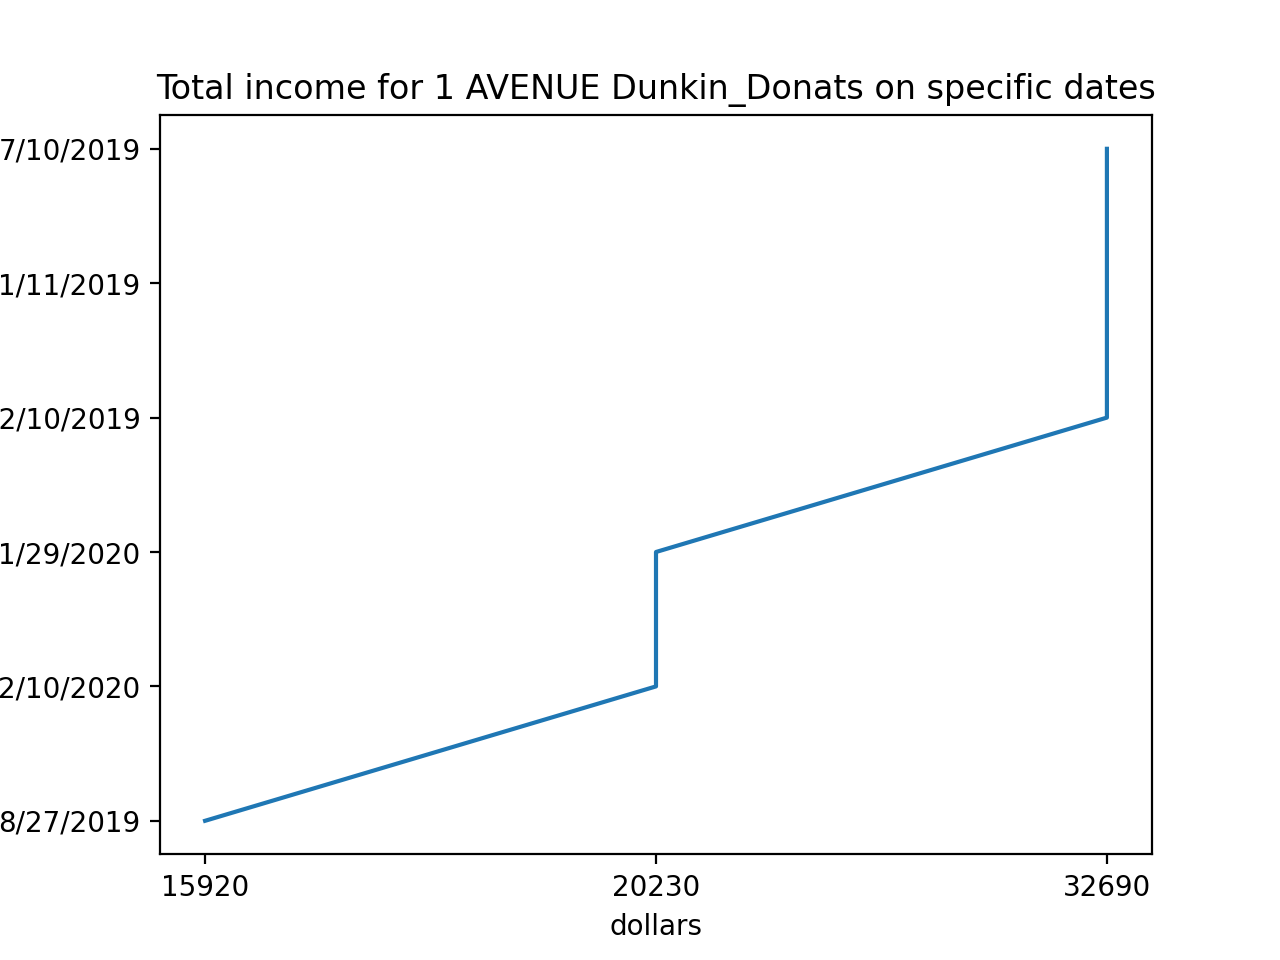

In [49]:
data1.filter(data1.STREET == "1 AVENUE").show()
q2= data1.filter(data1.STREET == "1 AVENUE").collect()
cs = []
print(len(q2))
for i in range(len(q2)):
    cs.append((q2[i][3],q2[i][8]))

CS = np.array(cs)

CS= sorted(CS, key= lambda x: x[:][0])

income = []
date = []
for i in CS:
    income.append(i[0])
    date.append(i[1])
income = np.array(income)
date = np.array(date)
plt.title('Total income for 1 AVENUE Dunkin_Donats on specific dates')
plt.xlabel('dollars')
plt.ylabel('date')
plt.plot(income,date)

In [50]:
plt.close()
sc1.stop()

# Analysis part:


For the Starbucks, we can easliy find that the store which in Broadway has lower income throughout the pandemic period than normal. Broadway Starbucks experienced a huge decrease on income due to the Covid impact. Moving on to the Starbucks at lexington ave. Although during the covid period its income is decreased a little bit compare to it's maximum point, Lexington ave Starbucks are still higher than Average income level. I guess the reason is that uptown doesn't have that many workers than the midtown, same with the vistors during the pandemic. 

For the Dunkin_Donats, both lexington ave and 1 ave stores were facing a huge decrease on their income. That is pretty usual to me since during the pandemic, everyone is worried about the food they eat every day. So they probably buy food from outside restaurants as least as possible. In this way, they can reduce their chance to get infected by the covid.

# Conclusion

Based on the information above, the COVID did impact the economy for the restaurants in New York. Pandemic destories many restaurants income compared to the normal period. But it is lucky to see that nowadays more and more restaurants are surviving 